<IPython.core.display.Javascript object>


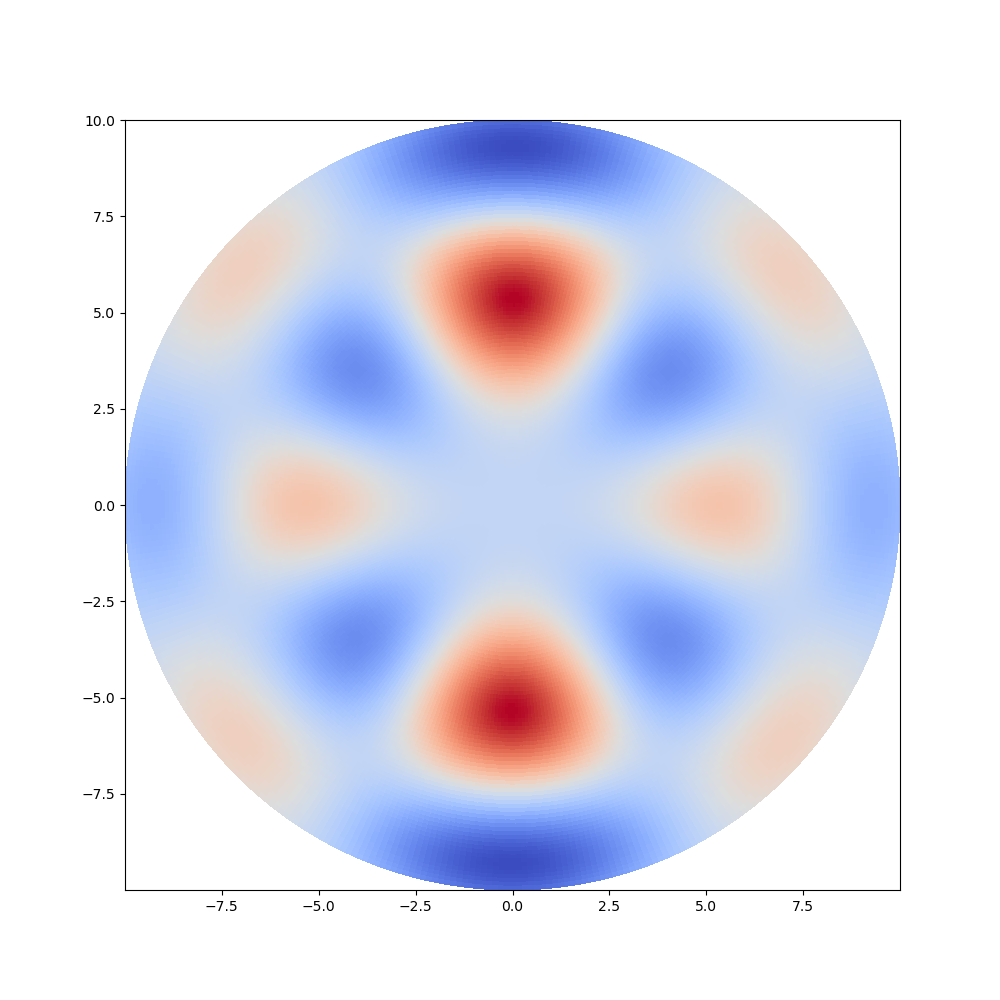

In [54]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import hankel1, jv, lpmv, jvp, 
from scipy.signal import correlate
%matplotlib notebook

def amplitude(ls, x, θ):
    S = 0
    C = np.cos(θ)
    for l in ls:
        S += 1j**l * (2*l+1)*jv(l, x)*lpmv(0, l, C)
    return S

def amplitude2(ls, x, θ, a):
    S = 0
    C = np.cos(θ)
    for l in ls:
        S += 1j**l * (2*l+1)*a[l]*hankel1(l, x)*lpmv(0, l, C)
    return S


θ = np.linspace(0, 2*np.pi, 400)
R = np.linspace(0, 10, 100)
T = np.linspace(0, 1, 100)
R, θ = np.meshgrid(R, θ)
k = 1
ω = 2*np.pi
l = [4]
al = np.ones(max(l)+1)
Z = amplitude(l, R*k, θ)
Zt = [Z*np.exp(-1j*ω*t) for t in T]
#Z = k*amplitude2(l, R*k, θ, al)
Y = R*np.cos(θ)
X = R*np.sin(θ)

fig = plt.figure(figsize=(10,10))
ax = fig.subplots()#fig.gca(projection='3d')
line = ax.pcolormesh(X, Y, np.real(Zt[0]), cmap=cm.coolwarm)
#plt.show()
#fig2 = plt.figure()
#ax = fig2.gca(projection='3d')
#ax.plot_surface(X, Y, np.imag(Z), cmap=cm.coolwarm, linewidth=0, cstride=1)

def update(num, data, line):
    ax.clear()
    line = ax.pcolormesh(X, Y, np.real(data[num]), cmap=cm.coolwarm, vmin=-1, vmax=1)
#ani = FuncAnimation(fig, update, fargs=(Zt, line), frames=range(len(Zt)), blit=False, interval=50)
plt.show()

In [ ]:
lpmv(0, 0, )

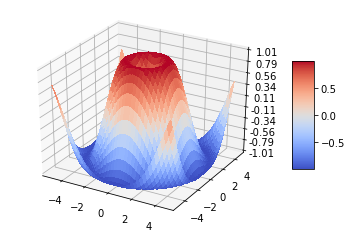

In [18]:
def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 100
data = np.array(list(gen(N))).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()

<IPython.core.display.Javascript object>


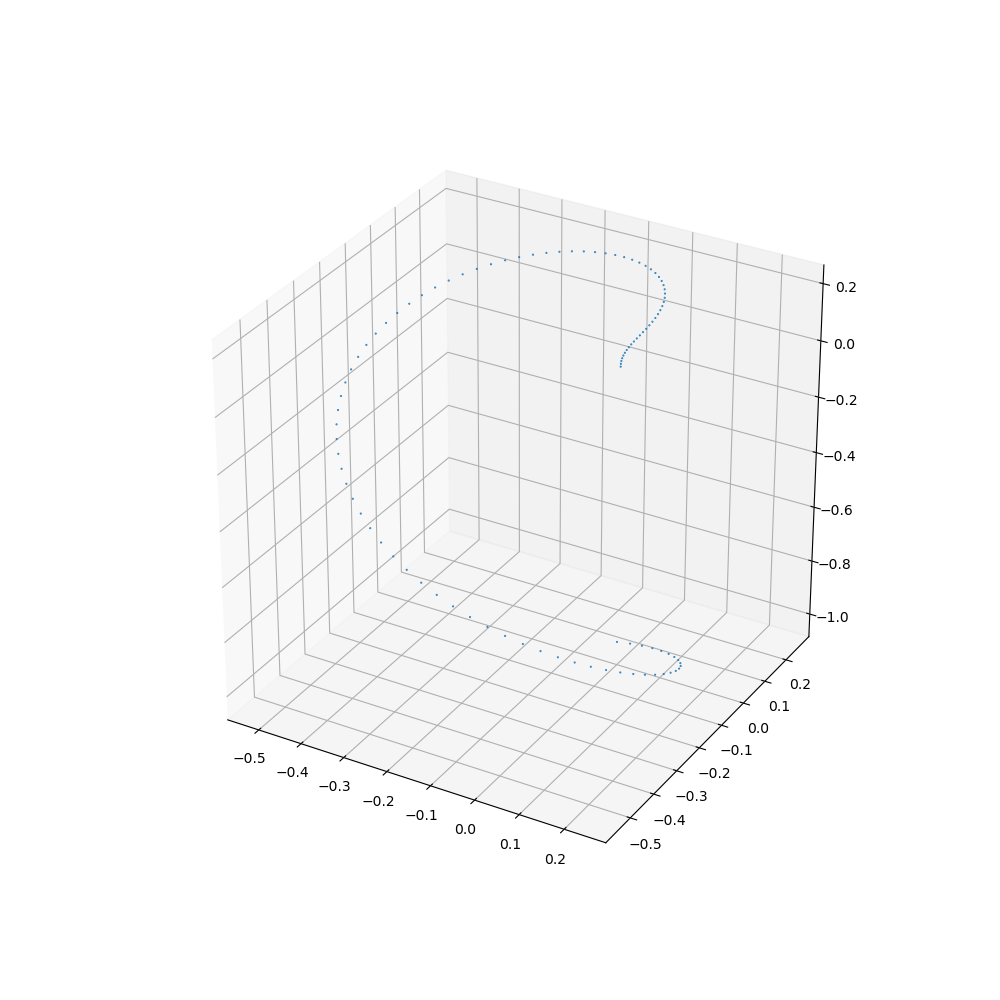

In [95]:
θ = np.linspace(0, np.pi, 100)
ϕ = np.linspace(0, 2*np.pi, 100)


r = np.linspace(0, 1, 5)
r, θ, ϕ = np.meshgrid(r, θ, ϕ)
x = r*np.sin(θ)*np.cos(ϕ)
y = r*np.sin(θ)*np.sin(ϕ)
z = r*np.cos(θ)
cNorm = matplotlib.colors.Normalize(vmin=np.min(r), vmax=np.max(r))
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.coolwarm)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c=scalarMap.to_rgba(r), alpha=0.1, marker='.', s=1)
#ax.pcolormesh(x,y,z, cmap=cm.coolwarm)

In [346]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.special import jv, yv, lpmv, jvp, yvp
from scipy.special import spherical_jn, spherical_yn
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import minimize

jv = spherical_jn
yv = spherical_yn
jvp = lambda l, x: spherical_jn(l, x, 1)
yvp = lambda l, x: spherical_yn(l, x, 1)

<IPython.core.display.Javascript object>


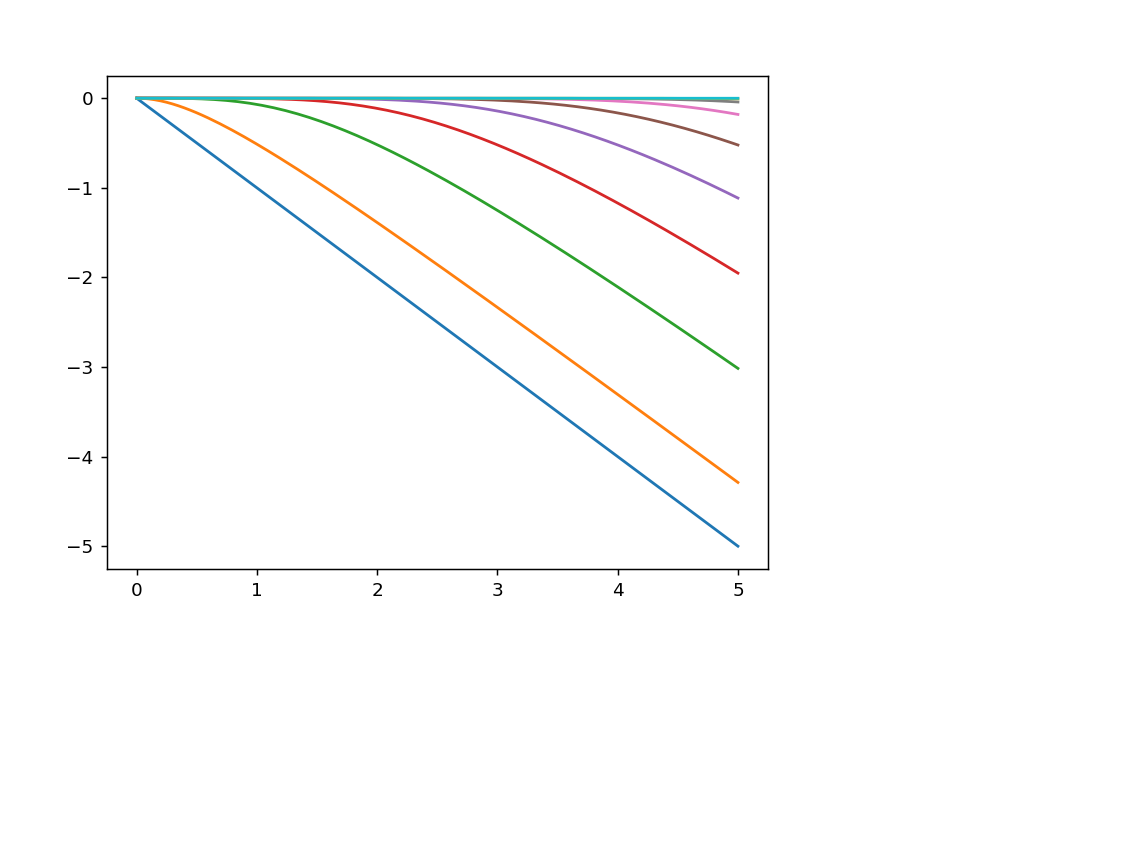

<IPython.core.display.Javascript object>


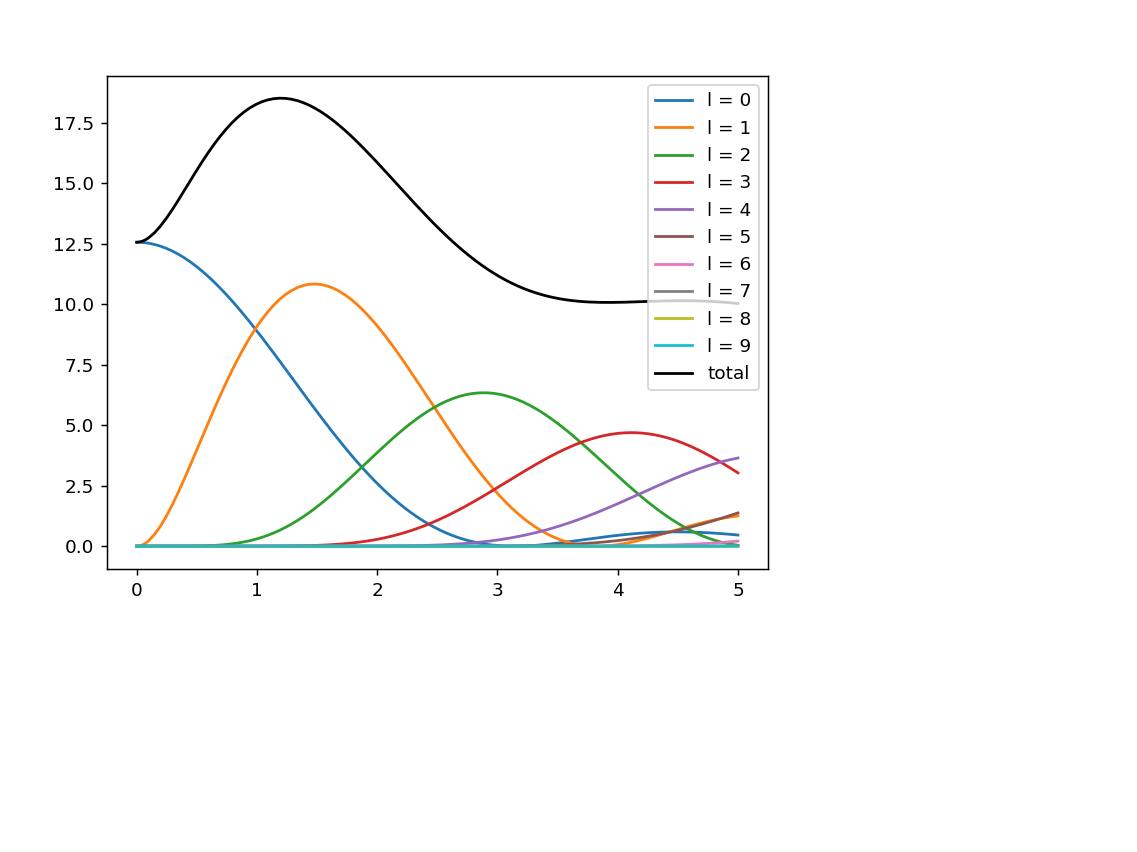

In [120]:
E = np.linspace(0, 1, 100)
m = 1
a = 1
p = np.append(np.linspace(0.001, 0.1, 1000), np.linspace(0.1, 5, 100))

def δl(l, p, a):
    if l == 0:
        return -p*a
    else:
        return np.arctan2(jv(l, p*a),yn(l, p*a)) - np.pi
        #return np.arctan(jv(l, p*a)/yn(l, p*a))
def σl(l, p, a):
    return 4*np.pi/p**2*(2*l + 1)*np.sin(δl(l, p, a))**2

fig, ax = plt.subplots()
for l in range(0, 10):
    ax.plot(p*a, δl(l, p, a), label=f"l = {l}")
    
fig, ax = plt.subplots()
σ = 0
for l in range(0, 10):
    sl = σl(l, p, a)
    σ += sl
    ax.plot(p*a, sl, label=f"l = {l}")
ax.plot(p*a, σ, label="total", c='k')
ax.legend()
#ax.set_ylim(0, 15)

In [142]:
def ψ(r, θ, k, a):
    C = np.cos(θ)
    S = 0
    for l in range(0, 1):
        dl = δl(l, k, a)
        S += 1*(np.cos(dl)*jv(l, k*r)-np.sin(dl)*yn(l, k*r))*lpmv(0, l, C)
    return S

def ψf(r, θ, k, a):
    S = 0
    C = np.cos(θ)
    for l in range(1, 2):
        S += 1j**l * (2*l+1)*jv(l, r*k)*lpmv(0, l, C)
    return S

<IPython.core.display.Javascript object>


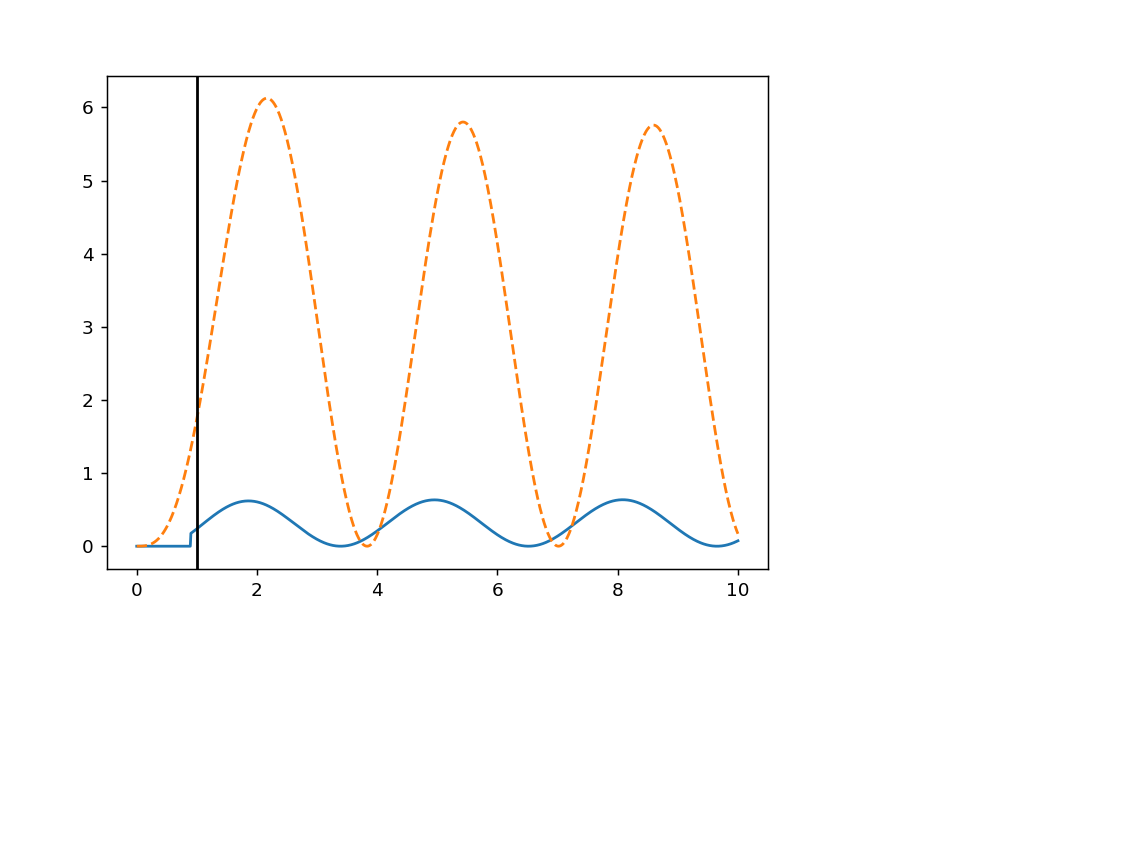

In [145]:
r = np.linspace(0, 10, 1000)
θ = 0
a = 1
k = 1
fig, ax = plt.subplots()
psi = ψ(r, θ, k, a)
psi[r <= 0.9*a] = 0
psif = ψf(r, θ, k, a)
ax.plot(r, r*np.absolute(psi)**2)
ax.plot(r, r*np.absolute(psif)**2, '--')
ax.axvline(a, c='k')
#ax.set_ylim(0, 1)

## Wells and Barriers

In [329]:
def ϕl(l, k, r, a, b):
    kprime = np.sqrt(k**2 - b)
    Al = 1
    j = jv(l, k*a)
    n = yv(l, k*a)
    jd = jvp(l, k*a)
    nd = jvp(l, k*a)
    jj = jv(l, kprime*a)
    jjd = jvp(l, kprime*a)
    du = jv(l, k*a)/jvp(l, k*a)*jvp(l, kprime*a) - jv(l, kprime*a)
    dn = jv(l, k*a)/jvp(l, k*a)*yvp(l, k*a) - yv(l, k*a)
    Dl = du/dn * Al
    Cl = (Al*jv(l, kprime*a) - Dl*yv(l, k*a))/jv(l, k*a)
    #Cl = -(Al*nd*jj - Al*n*jjd)/(jd*n-j*nd)
    #Dl = -(-Al*jd*jj + Al*j*jjd)/(jd*n-j*nd)
    higher = Cl*jv(l, k*r) + Dl*yv(l, k*r)
    lower = Al*jv(l, kprime*r)
    higher[r <= a] = lower[r <= a]
#    print(Cl)
#    print(Dl)
#    print(Cl*jv(l, k*a)+Dl*yv(l, k*a))
#    print(Al*jv(l, kprime*a))
#    print(Cl*jvp(l, k*a)+Dl*yvp(l, k*a))
#    print(Al*jvp(l, kprime*a))
    return higher, np.arctan2(np.real(-Dl),np.real(Cl))

def free(l, k, r):
    C = np.cos(0)
    return (2*l+1)*(1j)**l*jv(l, k*r)*lpmv(0, l, C)

<IPython.core.display.Javascript object>


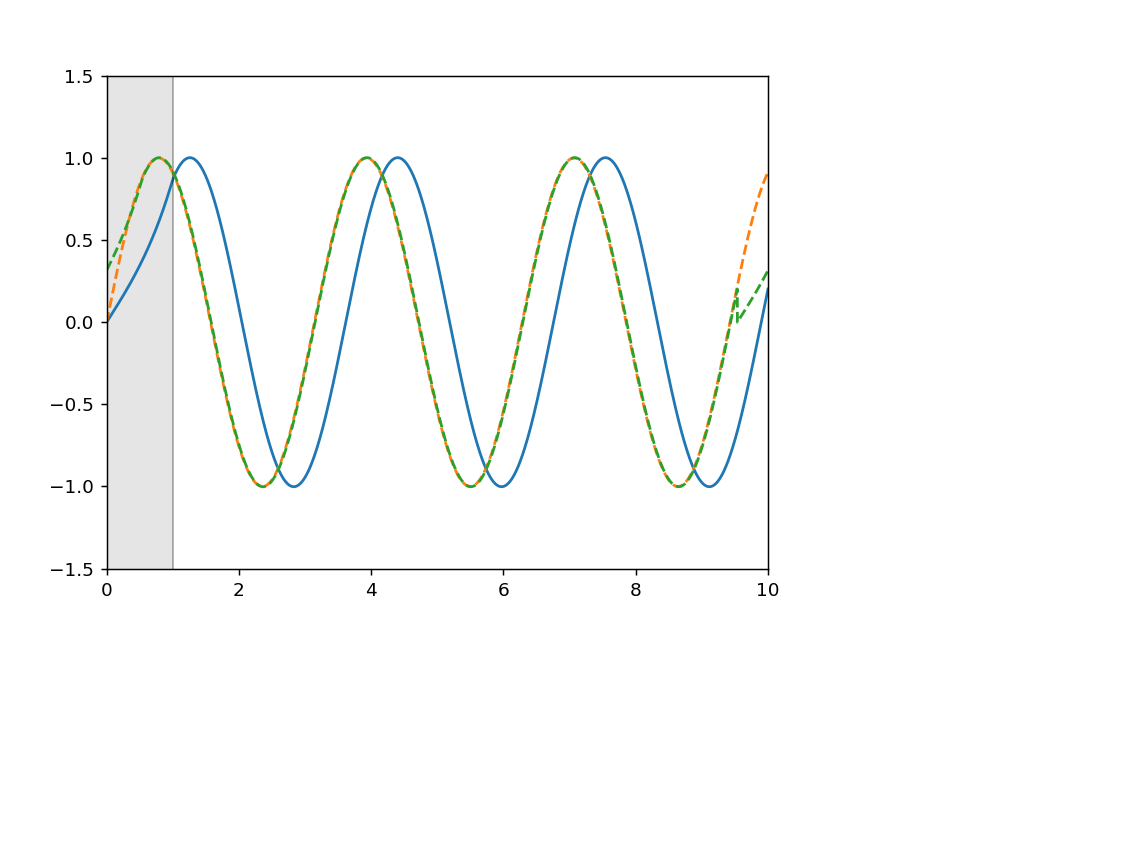

   direc: array([[1.]])
     fun: 1991.1188999717579
 message: 'Optimization terminated successfully.'
    nfev: 33
     nit: 2
  status: 0
 success: True
       x: array(-464.37865169)
-464 9.536953695369537


In [370]:
fig, ax = plt.subplots()
a = 1
k = 2/a + 0j
b = 6/a**2
r = np.linspace(0, 10, 10000)
phil = r*ϕl(0, k, r, a, b)[0]
f = r*free(0, k, r)
# Scale the second maximum
phil /= np.max(phil)
f /= np.max(f)

ax.plot(r, phil) 
ax.plot(r, f, '--')
ax.axvline(a, c='k', alpha=0.3, lw=1)
ax.fill_between([0, a], -2, 2, facecolor='k', alpha=0.1)
ax.set_xlim(0, max(r))
ax.set_ylim(-1.5, 1.5)

ax.plot(r, np.roll(phil, s), '--')

In [486]:
def find_phase_shift(fact, candidate, r, a):
    c = correlate(fact, candidate)
    τ = np.argmax(c)
    if τ >= len(candidate):
        #fig, ax = plt.subplots()
        #ax.plot(c)
        return 0, 0
    return τ, r[τ]


running for [0, 1, 2]
0
1
2


<IPython.core.display.Javascript object>


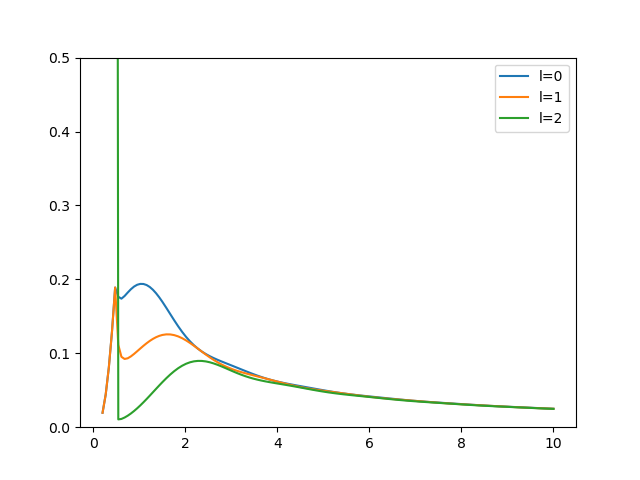

In [528]:
def find_phase(l, b=1, kmax=10, rmax=20, N=300):
    ks = np.append(np.linspace(0.2, 1.5, 20), np.linspace(1.5, kmax, N))
    a = 2
    b = b/a**2 + 0j
    r = np.linspace(0, rmax, 3000)
    δ = np.zeros((len(l), len(ks)))
    print(f"running for {l}")
    for i, _l in enumerate(l):
        for j, k in enumerate(ks):
            # *r to remove infinities
            #print(k)
            phil, d = ϕl(_l, k, r, a, b)
            phil *= r
            f = r*free(_l, k, r)
            # Scale
            phil /= np.max(phil)
            f /= np.max(f)
            
            #fig, ax = plt.subplots()
            #ax.plot(r, phil, label='Potential') 
            #ax.plot(r, f, '--', label="Free")
            #ax.axvline(a, c='k', alpha=0.3, lw=1)
            #ax.fill_between([0, a], -2, 2, facecolor='k', alpha=0.1)
            #ax.set_xlim(0, max(r))
            #ax.set_ylim(-1.5, 1.5)
            ind, shift = find_phase_shift(f, phil, r, a)
            #ax.plot(r, np.roll(phil, ind), '--', label='shifted')
            #ax.set_title(f"l = {_l}, k = {k:.2f}")
            #fig.savefig(f'testplots/figl{_l}-{j}.png')
            δ[i, j] = -d#shift
        print(i)
    return δ, ks

ls = [0, 1, 2]
δ, ks = find_phase(ls, N=100, b=1)
fig, ax = plt.subplots()
for i, l in enumerate(ls):
    ax.plot(ks, δ[l, :], label=f"l={l}")
ax.set_ylim(0, 0.5)
ax.legend()

<IPython.core.display.Javascript object>


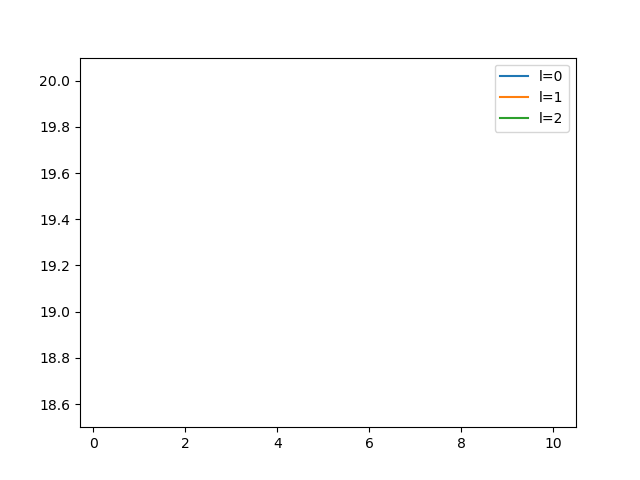

In [527]:
fig, ax = plt.subplots()
for i, l in enumerate(ls):
    x = ks[δ[l, :] > 0]
    y = δ[l, δ[l, :]>0]
    ax.plot(x, y, label=f"l={l}")
ax.set_ylim(18.5, 20.1)
#ax.set_xlim(17, 20)
ax.legend()

<IPython.core.display.Javascript object>


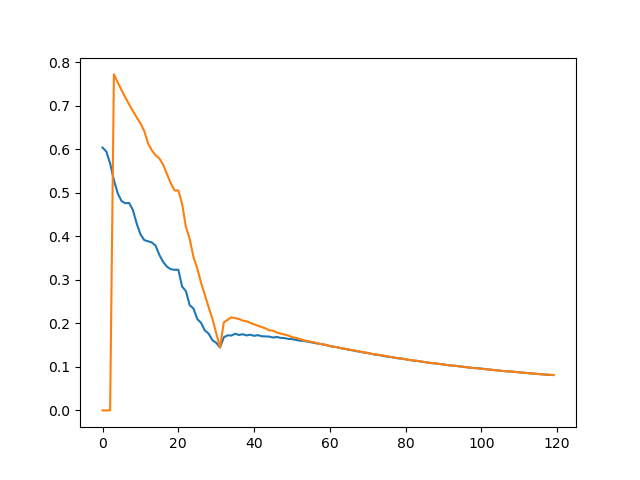

In [520]:
def crosssection(l, p, a, phase):
    return 4*np.pi/p**2*(2*l + 1)*np.sin(phase[l, stuff])**2

fig, ax = plt.subplots()
ax.plot(1/ks*np.sin(δ[0, :])**2)
ax.plot(1/ks*np.sin(δ[1, :])**2)

# TODO
- [x] Match the Al with Dl and Cl and derivaties to make the graph smooth. Use the shift to deduce phase shift
- [x] Find the phase shift
- [x] Loop over k, extract phase shift and plot
- [x] Find another method to find phase shift
  - Autocorrelation works well, but the phase shifts are bumpy
    and doesn't look exactly as expected.